<a href="https://colab.research.google.com/github/RubaEgbaria/kmeans_vs_fuzzyCMeans/blob/master/k_means_vs_fuzzy_c_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
import io

from google.colab import files
uploaded = files.upload()

data = pd.read_csv(io.BytesIO(uploaded['data.csv']))
# Dataset is now stored in a Pandas Dataframe

Saving data.csv to data.csv


In [2]:
# drop unneeded features
dataset = data.drop(['id','business_name','street_name','owner','business_type'], axis = 1,inplace = True)

In [3]:
# main features are
data.head()

,business_number,area,street_number,cost
0,1010,24101,1011,4
1,3211,24101,1011,1
2,4630,24101,1011,4
3,4663,24101,1032,3
4,4663,24101,1032,3


In [4]:
# cost
data['cost'].describe()

,cost
count,1126.000000
mean,3.313499
std,0.987178
min,1.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,5.000000


In [5]:
# Prepare the data for clustering
# cross between 2 colomns to business number and the area to find the similarity
darea = pd.DataFrame(data, columns = ['business_number','area'])

#حوض مهنه
dlast = pd.crosstab(index = darea['area'], columns = darea['business_number'],margins = True )
dlast

business_number,1010,1030,1050,1071,1073,1079,1410,1430,1511,1512,...,9312,9329,9511,9512,9521,9522,9529,9601,9602,All
area,,,,,,,,,,,,,,,,,,,,,
24001,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
24002,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
24003,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,12
24004,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
24005,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24108,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,2,40
24109,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,53
24110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11


In [6]:
#sorted area accodring to business sum in each area
sorted = dlast.sort_values(by=['All'])
sorted.drop(['All'], axis=0, inplace=True)
sorted

business_number,1010,1030,1050,1071,1073,1079,1410,1430,1511,1512,...,9312,9329,9511,9512,9521,9522,9529,9601,9602,All
area,,,,,,,,,,,,,,,,,,,,,
24105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
24042,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24039,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24109,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,53
24102,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,58
24013,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,4,1,0,0,0,107


In [7]:
# dataframe of sorted by buisness count
sortedBuisness = sorted.loc[:,'All']
sortedBuisness

,All
area,
24105,1
24049,1
24042,1
24040,1
24039,1
...,...
24109,53
24102,58
24013,107


In [8]:
# dataframe of sorted areas
sortedAreas = sorted.iloc[:,:1]
sortedAreas
areas = sortedAreas.index
areas

Index([24105, 24049, 24042, 24040, 24039, 24034, 24028, 24026, 24010, 24021,
       24069, 24045, 24017, 24016, 24048, 24063, 24072, 24075, 24046, 24004,
       24008, 24057, 24061, 24054, 24038, 24022, 24104, 24055, 24035, 24053,
       24078, 24007, 24009, 24024, 24059, 24041, 24047, 24064, 24058, 24001,
       24011, 24032, 24002, 24005, 24029, 24076, 24079, 24067, 24110, 24103,
       24003, 24036, 24030, 24006, 24052, 24107, 24060, 24106, 24068, 24037,
       24101, 24051, 24031, 24015, 24111, 24108, 24109, 24102, 24013, 24012,
       24014],
      dtype='object', name='area')

In [9]:
#dataframe for area with job count
areasJobCount = pd.DataFrame(sortedAreas.index)
areasJobCount.insert(1, 'profession_count',sorted.loc[:,'All'].values, True)
areasJobCount

,area,profession_count
0,24105,1
1,24049,1
2,24042,1
3,24040,1
4,24039,1
...,...,...
66,24109,53
67,24102,58
68,24013,107
69,24012,149


In [10]:
# The cost with the area
areaCost = pd.DataFrame(data, columns=['area','cost'])
areaCost

,area,cost
0,24101,4
1,24101,1
2,24101,4
3,24101,3
4,24101,3
...,...,...
1121,24051,3
1122,24052,4
1123,24052,2
1124,24052,3


In [11]:
#frequency table for cost with area
areaCostTable = pd.crosstab(index=areaCost['cost'], columns=areaCost['area'],margins=True )
areaCostTable

area,24001,24002,24003,24004,24005,24006,24007,24008,24009,24010,...,24103,24104,24105,24106,24107,24108,24109,24110,24111,All
cost,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,...,1,0,1,2,1,0,6,2,0,34
2,4,1,3,1,3,5,0,2,0,0,...,0,0,0,3,1,8,13,0,6,197
3,2,4,5,0,4,6,1,1,2,1,...,6,2,0,7,9,19,18,2,10,405
4,1,1,3,0,0,1,3,0,1,0,...,4,1,0,6,3,10,15,4,14,362
5,0,1,1,2,0,1,1,0,2,0,...,0,1,0,2,3,3,1,3,7,128
All,7,7,12,3,8,13,5,3,5,1,...,11,4,1,20,17,40,53,11,37,1126


In [12]:
#find the cost count for every area
costCount = areaCost.groupby(['area']).agg({'cost': 'sum'})
#add the cost number to th data frame
costCount.insert(1, 'cost_count',areaCostTable.loc['All'], True)
costCount

,cost,cost_count
area,,
24001,18,7
24002,23,7
24003,38,12
24004,12,3
24005,19,8
...,...,...
24107,57,17
24108,128,40
24109,151,53


In [13]:
#cross between 2 colomns to business number and the area to find the similarity

professionAreaDf = pd.DataFrame(data, columns=['business_number', 'area'])
crossTabulation = pd.crosstab(index=professionAreaDf['area'], columns=professionAreaDf['business_number'], margins=True)
crossTabulation = crossTabulation.drop('All', axis=0)
sortedAreas = crossTabulation.sort_values(by=['All'])

# all professions count with the area
sortedProfessionCounts = sortedAreas.loc[:, 'All']
sortedProfessionCounts

,All
area,
24105,1
24049,1
24042,1
24040,1
24039,1
...,...
24109,53
24102,58
24013,107


In [14]:
# area
areaData = pd.DataFrame(costCount.index, columns=['area'])

# avg cost for each area
costAvg = costCount['cost'] / costCount['cost_count']

# necessary information
dataFrame = costCount.copy()
dataFrame.insert(1, 'cost_avg', costAvg, True)
dataFrame.insert(2, 'profession_count', sortedProfessionCounts, True)
dataFrame.drop(['cost','cost_count'], axis=1, inplace=True)

dataFrame


,cost_avg,profession_count
area,,
24001,2.571429,7
24002,3.285714,7
24003,3.166667,12
24004,4.000000,3
24005,2.375000,8
...,...,...
24107,3.352941,17
24108,3.200000,40
24109,2.849057,53


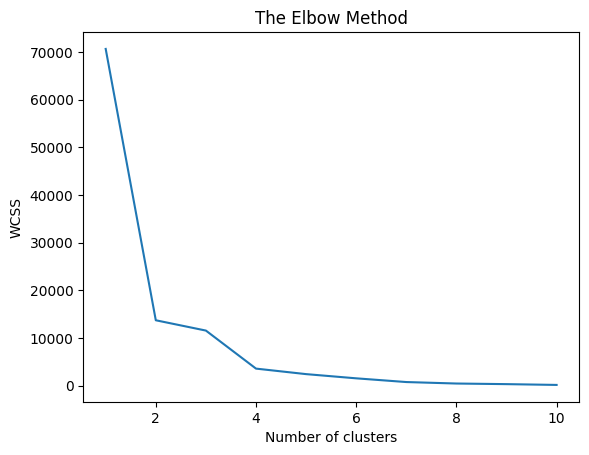

In [15]:
# Elbow method

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataFrame)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Silhouette Score: 0.7302177704235568
   Cluster  Count
0        0     59
1        1      1
2        2      2
3        3      9


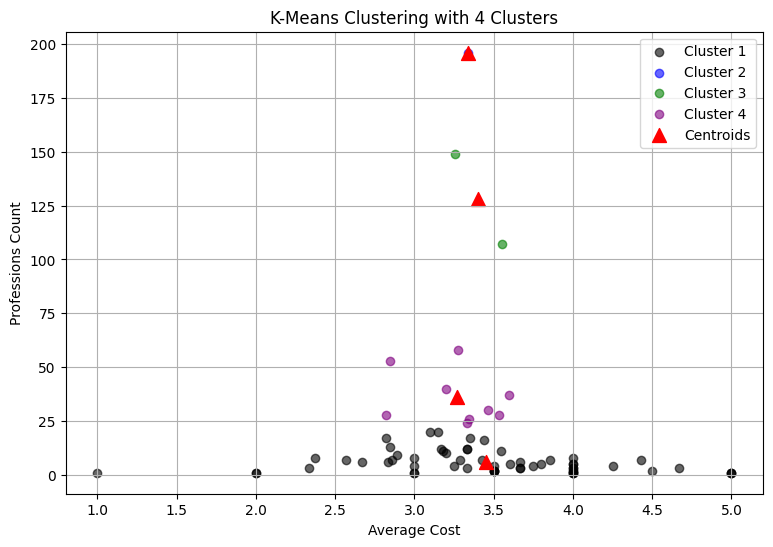

In [16]:
# k-means clustering using 4 clusters

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
coordinates = kmeans.fit_predict(dataFrame[['cost_avg', 'profession_count']])

# solhoutte score
silhouetteKMC = silhouette_score(dataFrame[['cost_avg', 'profession_count']], coordinates)
print('Silhouette Score:', silhouetteKMC)

clusterCounts = np.bincount(coordinates)

clusterInfo = pd.DataFrame({
    'Cluster': np.arange(len(clusterCounts)),
    'Count': clusterCounts
})

print(clusterInfo)

colors = ['black', 'blue', 'green', 'purple']

plt.figure(figsize=(9, 6))

for i in range(4):
    plt.scatter(dataFrame.loc[coordinates == i, 'cost_avg'],
                dataFrame.loc[coordinates == i, 'profession_count'],
                color=colors[i], label=f'Cluster {i+1}', alpha=0.6)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, label='Centroids', marker='^')

plt.title('K-Means Clustering with 4 Clusters')
plt.xlabel('Average Cost')
plt.ylabel('Professions Count')
plt.legend()
plt.grid()
plt.show()


In [17]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 12.6 MB/s eta 0:00:00


Silhouette Score: 0.6964860349962676
   Cluster  Count
0        0      2
1        1     54
2        2      3
3        3     12


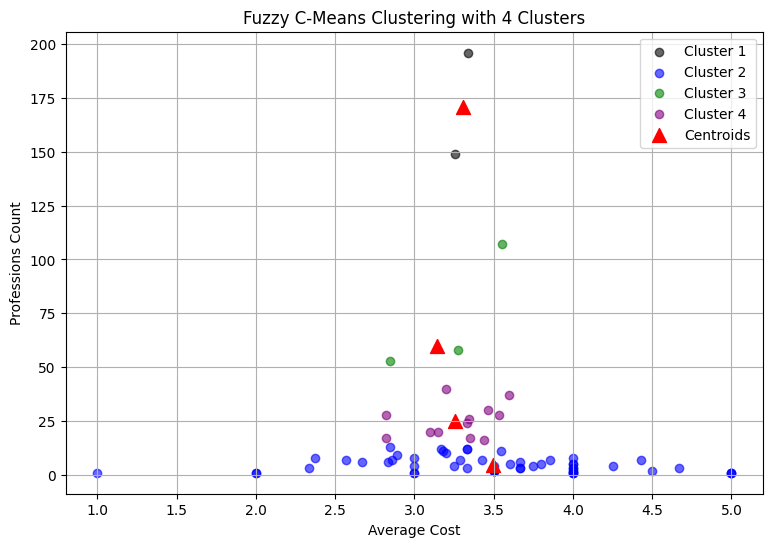

In [18]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import matplotlib.pyplot as plt

fcmData = dataFrame[['cost_avg', 'profession_count']].values

centers, U, _, _, _, _, _ = fuzz.cluster.cmeans(fcmData.T, c=4, m=2, error=0.005, maxiter=1000, init=None)

coordinates = np.argmax(U, axis=0)

# silhouette score
silhouetteAvg = silhouette_score(fcmData, coordinates)
print('Silhouette Score:', silhouetteAvg)

clusterCounts = np.bincount(coordinates)

clusterInfo = pd.DataFrame({
    'Cluster': np.arange(len(clusterCounts)),
    'Count': clusterCounts
})

print(clusterInfo)

plt.figure(figsize=(9, 6))

for i in range(4):
    plt.scatter(fcmData[coordinates == i, 0], fcmData[coordinates == i, 1],
                color=colors[i], label=f'Cluster {i+1}', alpha=0.6)

centroids = centers
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, label='Centroids', marker='^')

# titles and labels
plt.title('Fuzzy C-Means Clustering with 4 Clusters')
plt.xlabel('Average Cost')
plt.ylabel('Professions Count')
plt.legend()
plt.grid()
plt.show()



Silhouette Score KMC: 0.8968714809773779
   Cluster  Count
0        0     68
1        1      3
Silhouette Score FCM: 0.8968714809773779
   Cluster  Count
0        0      3
1        1     68


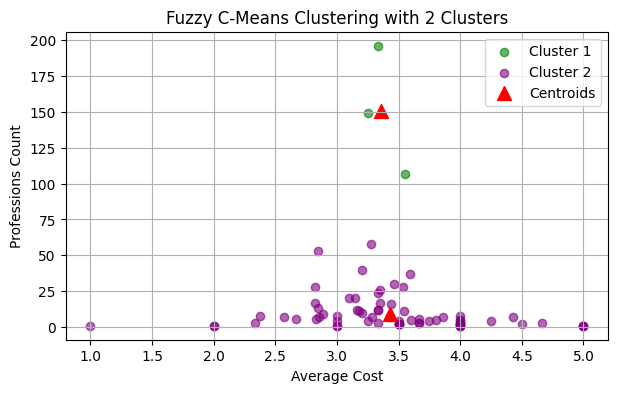

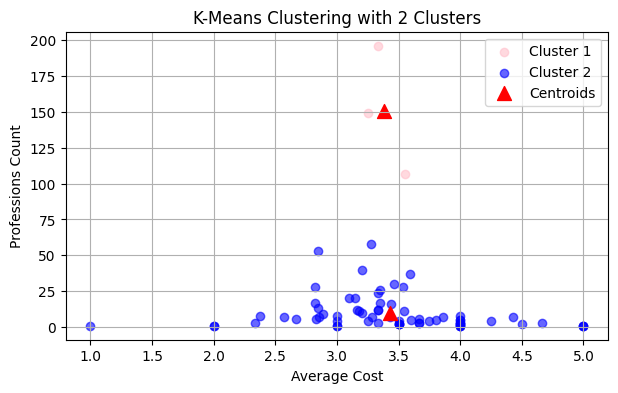

In [19]:
# k-means and fuzzy clustering using 2 clusters

kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
coordinates = kmeans.fit_predict(dataFrame[['cost_avg', 'profession_count']])

# solhoutte score
silhouetteKmc = silhouette_score(dataFrame[['cost_avg', 'profession_count']], coordinates)
print('Silhouette Score KMC:', silhouetteKmc)

clusterCounts = np.bincount(coordinates)

clusterInfo = pd.DataFrame({
    'Cluster': np.arange(len(clusterCounts)),
    'Count': clusterCounts
})

print(clusterInfo)

colors = [ 'green', 'purple']

fcmData = dataFrame[['cost_avg', 'profession_count']].values

centers, U, _, _, _, _, _ = fuzz.cluster.cmeans(fcmData.T, c=2, m=2, error=0.005, maxiter=1000, init=None)

coordinates = np.argmax(U, axis=0)

# silhouette score
silhouetteAvg = silhouette_score(fcmData, coordinates)
print('Silhouette Score FCM:', silhouetteAvg)

clusterCounts = np.bincount(coordinates)

clusterInfo = pd.DataFrame({
    'Cluster': np.arange(len(clusterCounts)),
    'Count': clusterCounts
})

print(clusterInfo)

plt.figure(figsize=(7, 4))

for i in range(2):
    plt.scatter(fcmData[coordinates == i, 0], fcmData[coordinates == i, 1],
                color=colors[i], label=f'Cluster {i+1}', alpha=0.6)

centroids = centers
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, label='Centroids', marker='^')

# titles and labels
plt.title('Fuzzy C-Means Clustering with 2 Clusters')
plt.xlabel('Average Cost')
plt.ylabel('Professions Count')
plt.legend()
plt.grid()
plt.show()



colors = ['pink', 'blue']

plt.figure(figsize=(7, 4))

for i in range(2):
    plt.scatter(dataFrame.loc[coordinates == i, 'cost_avg'],
                dataFrame.loc[coordinates == i, 'profession_count'],
                color=colors[i], label=f'Cluster {i+1}', alpha=0.6)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, label='Centroids', marker='^')

plt.title('K-Means Clustering with 2 Clusters')
plt.xlabel('Average Cost')
plt.ylabel('Professions Count')
plt.legend()
plt.grid()
plt.show()


In [20]:
# get the sorted business number col
sortedBusinessNumber = dlast.columns
sortedBusinessNumber

Index([ 1010,  1030,  1050,  1071,  1073,  1079,  1410,  1430,  1511,  1512,
        1520,  1622,  1709,  2159,  2220,  2511,  2591,  2592,  2670,  3100,
        3211,  3250,  3311,  3520,  4100,  4321,  4322,  4329,  4330,  4510,
        4520,  4530,  4539,  4610,  4620,  4630,  4641,  4649,  4652,  4659,
        4662,  4663,  4711,  4721,  4723,  4730,  4741,  4751,  4752,  4753,
        4759,  4761,  4762,  4763,  4764,  4771,  4772,  4773,  4774,  4789,
        4791,  5210,  5229,  5310,  5510,  5610,  5630,  6020,  7020,  7310,
        7410,  7420,  7490,  7710,  7911,  7912,  8020,  8110,  8121,  8219,
        8292,  8549,  9000,  9312,  9329,  9511,  9512,  9521,  9522,  9529,
        9601,  9602, 'All'],
      dtype='object', name='business_number')

In [21]:
businessCost = pd.DataFrame(data, columns=['business_number', 'cost']).sort_values(by=['business_number'])
businessCost

businessCostSum = businessCost.groupby(['business_number']).agg({'cost': 'sum'})
businessCostCount = businessCost.groupby(['business_number']).agg({'cost': 'count'})
businessCostSum.insert(1, 'cost_count', businessCostCount['cost'], True)
businessCostSum

,cost,cost_count
business_number,,
1010,74,24
1030,32,8
1050,7,2
1071,83,23
1073,73,19
...,...,...
9521,89,32
9522,20,8
9529,8,3


In [22]:
# the business number with the avg for this business number

businessCostAvg = businessCostSum['cost'] / businessCostSum['cost_count']

businessCostAvg.name = 'cost_avg'

businessCostAvg = businessCostAvg.reset_index()

businessCostAvg

,business_number,cost_avg
0,1010,3.083333
1,1030,4.000000
2,1050,3.500000
3,1071,3.608696
4,1073,3.842105
...,...,...
87,9521,2.781250
88,9522,2.500000
89,9529,2.666667
90,9601,5.000000


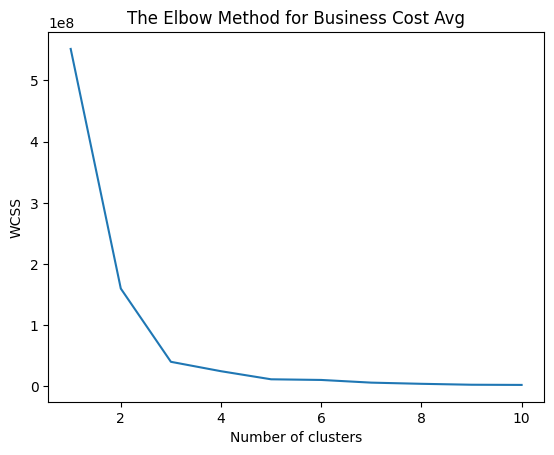

In [23]:

businessCostAvg_df = pd.DataFrame(businessCostAvg)

wcssBusiness = []
for i in range(1, 11):
    kmeans_business = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_business.fit(businessCostAvg_df)
    wcssBusiness.append(kmeans_business.inertia_)

plt.plot(range(1, 11), wcssBusiness)
plt.title('The Elbow Method for Business Cost Avg')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Silhouette Score KMC: 0.747379515188138
   Cluster  Count
0        0     48
1        1     24
2        2     20
Silhouette Score FCM: 0.7465695285789933
   Cluster  Count
0        0     24
1        1     21
2        2     47


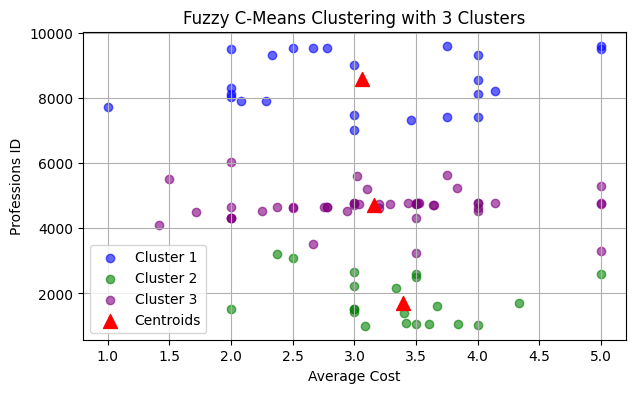

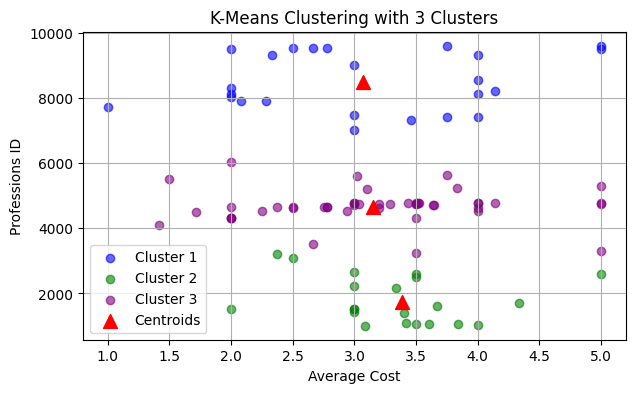

In [25]:
# k-means and fuzzy clustering using 3 clusters

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)


trainingData = businessCostAvg[['cost_avg', 'business_number']].values
coordinates = kmeans.fit_predict(trainingData)

# solhoutte score
silhouetteKmc = silhouette_score(trainingData, coordinates)
print('Silhouette Score KMC:', silhouetteKmc)

clusterCounts = np.bincount(coordinates)

clusterInfo = pd.DataFrame({
    'Cluster': np.arange(len(clusterCounts)),
    'Count': clusterCounts
})

print(clusterInfo)


centers, U, _, _, _, _, _ = fuzz.cluster.cmeans(trainingData.T, c=3, m=2, error=0.005, maxiter=1000, init=None)

coordinates = np.argmax(U, axis=0)

# silhouette score
silhouetteAvg = silhouette_score(trainingData, coordinates)
print('Silhouette Score FCM:', silhouetteAvg)

clusterCounts = np.bincount(coordinates)

clusterInfo = pd.DataFrame({
    'Cluster': np.arange(len(clusterCounts)),
    'Count': clusterCounts
})

print(clusterInfo)

colors = ['blue', 'green', 'purple']

plt.figure(figsize=(7, 4))

for i in range(3):
    plt.scatter(trainingData[coordinates == i, 0], trainingData[coordinates == i, 1],
                color=colors[i], label=f'Cluster {i+1}', alpha=0.6)

centroids = centers
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, label='Centroids', marker='^')

# titles and labels
plt.title('Fuzzy C-Means Clustering with 3 Clusters')
plt.xlabel('Average Cost')
plt.ylabel('Professions ID')
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(7, 4))

for i in range(3):
    plt.scatter(trainingData[coordinates == i, 0], trainingData[coordinates == i, 1],
                color=colors[i], label=f'Cluster {i+1}', alpha=0.6)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, label='Centroids', marker='^')

plt.title('K-Means Clustering with 3 Clusters')
plt.xlabel('Average Cost')
plt.ylabel('Professions ID')
plt.legend()
plt.grid()
plt.show()


In [26]:
# data file name -> customer_segmentation.csv

uploaded = files.upload()

customerData = pd.read_csv(io.BytesIO(uploaded['customer_segmentation.csv']))

# we will focus on clustering them based on those features
# sum of
# NumDealsPurchases: The number of purchases made with a discount or as part of a deal.
# NumWebPurchases: The number of purchases made through the company's website.
# NumCatalogPurchases: The number of purchases made through catalogs.
# NumStorePurchases: The number of purchases made in physical stores.
# with
# NumWebVisitsMonth: The number of visits to the company's website in a month.
# Income: The annual income of the individual.

Saving customer_segmentation.csv to customer_segmentation.csv


In [27]:
customerData.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [28]:
clusteringDataFeatures = customerData[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Income']]
clusteringDataFeatures.head()

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income
0,3,8,10,4,7,58138.0
1,2,1,1,2,5,46344.0
2,1,8,2,10,4,71613.0
3,2,2,0,4,6,26646.0
4,5,5,3,6,5,58293.0


In [29]:
# sum of number of purchases

clusteringDataFeatures['NumPurchases'] = clusteringDataFeatures['NumDealsPurchases'] + clusteringDataFeatures['NumWebPurchases'] + clusteringDataFeatures['NumCatalogPurchases'] + clusteringDataFeatures['NumStorePurchases']
clusteringDataFeatures.head()

<ipython-input-29-8353fb22f4f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clusteringDataFeatures['NumPurchases'] = clusteringDataFeatures['NumDealsPurchases'] + clusteringDataFeatures['NumWebPurchases'] + clusteringDataFeatures['NumCatalogPurchases'] + clusteringDataFeatures['NumStorePurchases']


,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,NumPurchases
0,3,8,10,4,7,58138.0,25
1,2,1,1,2,5,46344.0,6
2,1,8,2,10,4,71613.0,21
3,2,2,0,4,6,26646.0,8
4,5,5,3,6,5,58293.0,19


In [30]:
# drop the purchases, we will focus on the sum only
clusteringDataFeatures.drop(['NumWebVisitsMonth', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'], axis=1, inplace=True)
clusteringDataFeatures.head()

<ipython-input-30-966a5316edb7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clusteringDataFeatures.drop(['NumWebVisitsMonth', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'], axis=1, inplace=True)


,Income,NumPurchases
0,58138.0,25
1,46344.0,6
2,71613.0,21
3,26646.0,8
4,58293.0,19


Text(0.5, 0, 'Number of clusters')

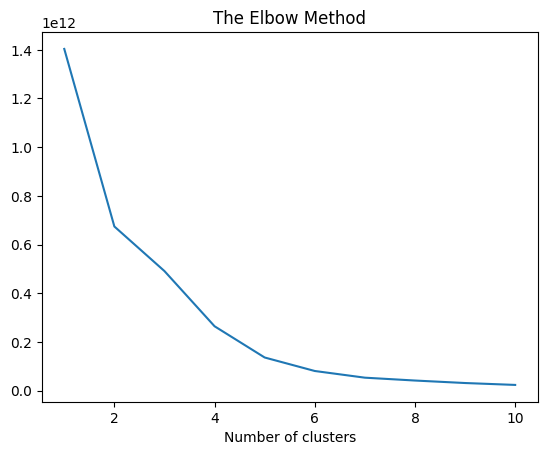

In [31]:
# the elbow method to see the best fit for numbers of clusters

clusteringDataFeatures = clusteringDataFeatures.dropna()

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(clusteringDataFeatures)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')

Silhouette Score: 0.6117559591820413
   Cluster  Count
0        0   1123
1        1   1084
2        2      8
3        3      1


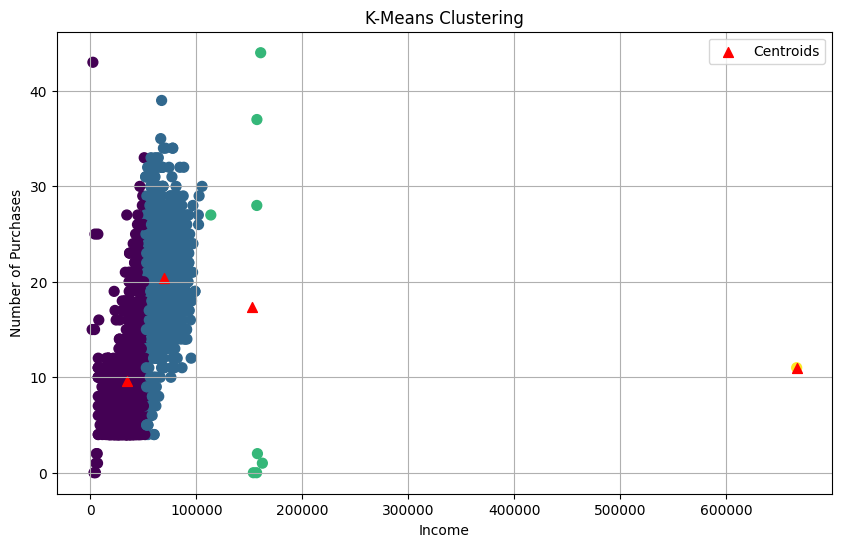

In [32]:
# K-Means clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
coordinates = kmeans.fit_predict(clusteringDataFeatures)

# Silhouette score
silhouetteKmc = silhouette_score(clusteringDataFeatures, coordinates)
print('Silhouette Score:', silhouetteKmc)

clusterCounts = np.bincount(coordinates)

clusterInfo = pd.DataFrame({
    'Cluster': np.arange(len(clusterCounts)),
    'Count': clusterCounts
})

print(clusterInfo)

plt.figure(figsize=(10, 6))
plt.scatter(clusteringDataFeatures['Income'], clusteringDataFeatures['NumPurchases'],
            c=coordinates, cmap='viridis', marker='o', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='^', s=50, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Income')
plt.ylabel('Number of Purchases')
plt.legend()
plt.grid()
plt.show()

Silhouette Score: 0.5209158479049223
   Cluster  Count
0        0    475
1        1    669
2        2    423
3        3    649


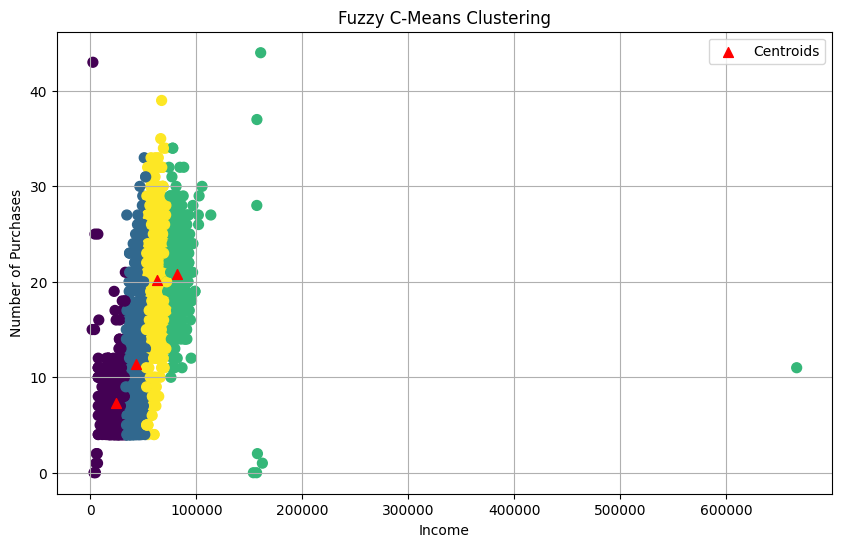

In [33]:
# Fuzzy C-Means clustering
centroid, u, _, _, _, _, _ = fuzz.cmeans(clusteringDataFeatures.T, 4, 2, error=0.005, maxiter=1000)

coordinates = np.argmax(u, axis=0)

# Silhouette score
silhouetteKmc = silhouette_score(clusteringDataFeatures, coordinates)
print('Silhouette Score:', silhouetteKmc)

clusterCounts = np.bincount(coordinates)

clusterInfo = pd.DataFrame({
    'Cluster': np.arange(len(clusterCounts)),
    'Count': clusterCounts
})

print(clusterInfo)

plt.figure(figsize=(10, 6))
plt.scatter(clusteringDataFeatures['Income'], clusteringDataFeatures['NumPurchases'],
            c=coordinates, cmap='viridis', marker='o', s=50)

plt.scatter(centroid[:, 0], centroid[:, 1],
            c='red', marker='^', s=50, label='Centroids')

plt.title('Fuzzy C-Means Clustering')
plt.xlabel('Income')
plt.ylabel('Number of Purchases')
plt.legend()
plt.grid()
plt.show()

In [34]:
# lets try to cluster customers and their purchases based on their year birth

customersPurchaseWithBirth = customerData['Year_Birth']
customersPurchaseWithBirth = pd.DataFrame(customersPurchaseWithBirth)
customersPurchaseWithBirth.insert(1, 'NumPurchases', clusteringDataFeatures['NumPurchases'], True)
customersPurchaseWithBirth.head()

,Year_Birth,NumPurchases
0,1957,25.0
1,1954,6.0
2,1965,21.0
3,1984,8.0
4,1981,19.0


In [35]:
# drop nulls
customersPurchaseWithBirth = customersPurchaseWithBirth.dropna()

Text(0.5, 0, 'Number of clusters')

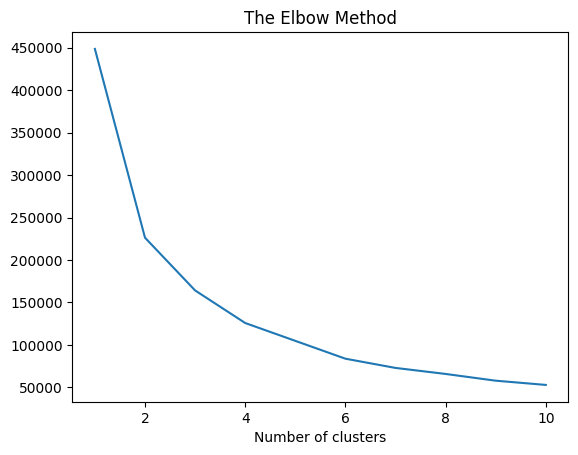

In [36]:
# Elbow method

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(customersPurchaseWithBirth)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')

Silhouette Score: 0.427513438885595
   Cluster  Count
0        0   1269
1        1    947


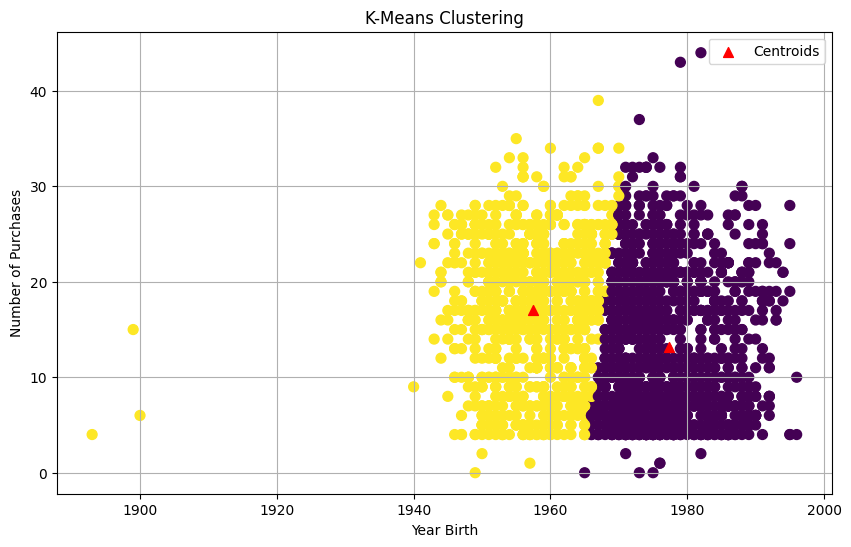

In [37]:
# kmeans

kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
coordinates = kmeans.fit_predict(customersPurchaseWithBirth)

# Silhouette score
silhouetteKMC = silhouette_score(customersPurchaseWithBirth, coordinates)
print('Silhouette Score:', silhouetteKMC)

clusterCounts = np.bincount(coordinates)

clusterInfo = pd.DataFrame({
    'Cluster': np.arange(len(clusterCounts)),
    'Count': clusterCounts
})

print(clusterInfo)

plt.figure(figsize=(10, 6))
plt.scatter(customersPurchaseWithBirth['Year_Birth'], customersPurchaseWithBirth['NumPurchases'],
            c=coordinates, cmap='viridis', marker='o', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='^', s=50, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Year Birth')
plt.ylabel('Number of Purchases')
plt.legend()
plt.grid()
plt.show()

Silhouette Score: 0.4258529129161681
   Cluster  Count
0        0   1238
1        1    978


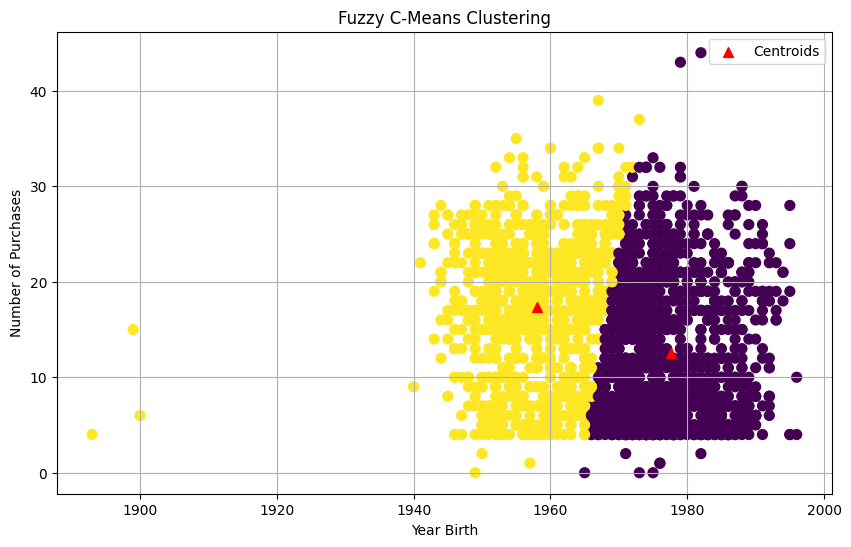

In [38]:
# Fuzzy
centroid, u, _, _, _, _, _ = fuzz.cmeans(customersPurchaseWithBirth.T, 2, 2, error=0.005, maxiter=1000)

coordinates = np.argmax(u, axis=0)

# Silhouette score
silhouetteKmc = silhouette_score(customersPurchaseWithBirth, coordinates)
print('Silhouette Score:', silhouetteKmc)

clusterCounts = np.bincount(coordinates)

clusterInfo = pd.DataFrame({
    'Cluster': np.arange(len(clusterCounts)),
    'Count': clusterCounts
})

print(clusterInfo)

plt.figure(figsize=(10, 6))
plt.scatter(customersPurchaseWithBirth['Year_Birth'], customersPurchaseWithBirth['NumPurchases'],
            c=coordinates, cmap='viridis', marker='o', s=50)

plt.scatter(centroid[:, 0], centroid[:, 1],
            c='red', marker='^', s=50, label='Centroids')

plt.title('Fuzzy C-Means Clustering')
plt.xlabel('Year Birth')
plt.ylabel('Number of Purchases')
plt.legend()
plt.grid()
plt.show()